<a href="https://colab.research.google.com/github/Ranjitghadge/Python_Master/blob/main/Pandas_%26_Numpy_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Array Creation

In [ ]:
import numpy as np

In [ ]:
# 1D Array
arr_1d = np.array([1,2,3])
print(arr_1d)

[1 2 3]


In [ ]:
# 2D Array

arr_2d = np.array([[1,2,3],[4,5,6]])

print(arr_2d)

[[1 2 3]
 [4 5 6]]


In [ ]:
#Zeros Array

arr_zeros = np.zeros((3,3))
print(arr_zeros)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
#Ones Array

arr_ones = np.ones((3,3))

print(arr_ones)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
#Range Array

np.arange(0,10,2)

array([0, 2, 4, 6, 8])

Array Indexing and Slicing






In [ ]:
#Accessing Elements 1D
arr_1d[1]

2

In [ ]:
#Accesing elements 2D
arr_2d[1,2] #start from 0

# [[1 2 3]
#  [4 5 6]]

6

In [ ]:
#slicing 1D
print(arr_1d[1:5])

[2 3]


In [ ]:
#slicing 2D
print(arr_2d[:,1:3])

[[2 3]
 [5 6]]


Basic Array Operations

In [ ]:
#Addition
arr_sum = arr_1d + arr_1d

print(arr_sum)

# [1 2 3]

[2 4 6]


In [ ]:
#Substraction

arr_diff = arr_1d - arr_1d

print(arr_diff)

[0 0 0]


In [ ]:
#Multiplication

arr_mul = arr_1d * arr_1d

print(arr_mul)

[1 4 9]


In [ ]:
#Division

arr_div = arr_1d / arr_1d

print(arr_div)

[1. 1. 1.]


In [ ]:
#Dot Product
arr_dot = np.dot(arr_2d,arr_2d.T)

print(arr_dot)

[[14 32]
 [32 77]]


Statistical Operations

In [ ]:
#mean
mean = np.mean(arr_2d)

print(mean)

3.5


In [ ]:
#median

median = np.median(arr_2d)

print(median)

3.5


In [ ]:
#Standard Deviation
std_dev = np.std(arr_2d)

print(std_dev)

1.707825127659933


In [ ]:
#variance
variance = np.var(arr_2d)

print(variance)

2.9166666666666665


In [ ]:
#Sum
total_sum = np.sum(arr_2d)

print(total_sum)

21


Array Reshaping


In [ ]:
#Reshape
reshaped = arr_2d.reshape((3,2))

print(reshaped)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
#Flattern
flattern = arr_2d.flatten()

print(flattern)

[1 2 3 4 5 6]


# Pandas

In [ ]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    'ID': [1, 2, 3, 4, 5, 6],
    'Name': ['Alice', 'Bob', None, 'David', 'Eva', 'Frank'],
    'Age': [25, np.nan, 30, 40, np.nan, 35],
    'Salary': [50000, 60000, np.nan, 80000, 90000, None],
    'Department': ['HR', 'Finance', None, 'IT', 'Finance', 'HR'],
    'Joining_Date': pd.to_datetime(['2020-01-01','2021-03-15','2021-06-01',
                                     '2022-01-12','2022-05-20','2023-07-01'])
}
df = pd.DataFrame(data)

print("Original:\n", df)

# -----------------------------
# 1. Missing Value Handling
# -----------------------------
print(df.isnull())
print(df.isnull().sum())
print(df.dropna())
print(df.dropna(subset=['Age']))
print(df.fillna(0))
print(df['Age'].fillna(df['Age'].mean()))
print(df['Salary'].fillna(df['Salary'].median()))
print(df.fillna(method='ffill'))
print(df.fillna(method='bfill'))
print(df['Age'].interpolate())
print(df.replace(np.nan, -1))
print(df.fillna({'Age': df['Age'].median(),
                 'Salary': df['Salary'].mean(),
                 'Department':'Not Assigned'}))

# -----------------------------
# 2. Selection & Filtering
# -----------------------------
print(df[['Name','Age']])
print(df[df['Age'] > 30])
print(df.query("Department == 'HR'"))

# -----------------------------
# 3. Aggregation & Grouping
# -----------------------------
print(df.groupby('Department')['Salary'].mean())
print(df.groupby('Department').agg({'Age':'mean','Salary':'sum'}))

# -----------------------------
# 4. Sorting
# -----------------------------
print(df.sort_values(by='Age'))
print(df.sort_values(by=['Department','Salary'], ascending=[True,False]))

# -----------------------------
# 5. Apply / Map Functions
# -----------------------------
print(df['Age'].apply(lambda x: x*2 if pd.notnull(x) else x))
print(df['Department'].map({'HR':'Human Resources',
                            'Finance':'Finance Dept',
                            'IT':'Tech Dept'}))

# -----------------------------
# 6. Merge, Join, Concat
# -----------------------------
dept_data = pd.DataFrame({'Department':['HR','Finance','IT'],
                          'Location':['Mumbai','Delhi','Bangalore']})
print(pd.merge(df, dept_data, on='Department', how='left'))
df2 = df[['ID','Name']]
print(pd.concat([df, df2], axis=1))

# -----------------------------
# 7. Pivot & Crosstab
# -----------------------------
print(df.pivot_table(values='Salary', index='Department', aggfunc='mean'))
print(pd.crosstab(df['Department'], df['Age'].isnull()))

# -----------------------------
# 8. Window Functions
# -----------------------------
print(df['Salary'].rolling(2).mean())
print(df['Age'].expanding().mean())
print(df['Salary'].ewm(span=2).mean())
print(df['Age'].rank())

# -----------------------------
# 9. Time Series (Resample)
# -----------------------------
print(df.set_index('Joining_Date').resample('Y')['Salary'].mean())

# -----------------------------
# 10. String Operations
# -----------------------------
print(df['Name'].str.upper())
print(df['Name'].str.contains('a', case=False, na=False))

# -----------------------------
# 11. Duplicate Handling
# -----------------------------
print(df.duplicated())
print(df.drop_duplicates(subset=['Department']))

# -----------------------------
# 12. Value Counts
# -----------------------------
print(df['Department'].value_counts())

# -----------------------------
# 13. Describe & Info
# -----------------------------
print(df.describe(include='all'))
print(df.info())


Pandas Practice

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Employee_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['John Smith', 'Jane Doe', 'Mary Johnson', 'James Williams', 'Patricia Brown', 'Robert Jones', 'Michael Garcia', 'Linda Martinez', 'David Hernandez', 'Barbara Wilson'],
    'Department': ['IT', 'HR', 'IT', 'Finance', 'HR', 'Finance', 'IT', 'HR', 'Finance', 'IT'],
    'Salary': [7000, 6000, 8000, 9000, 6500, 7000, 7500, 6200, 6800, 7200],
    'Experience': [5, 6, 7, 8, 5, 7, 6, 5, 8, 9],
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles', 'Chicago', 'New York', 'Los Angeles', 'Chicago', 'New York'],
    'Joining_Date': pd.to_datetime(['2018-01-15', '2017-03-12', '2019-05-23', '2020-07-01', '2018-08-10', '2019-09-29', '2021-02-14', '2021-06-18', '2022-11-21', '2020-10-02']),
    'Gender': ['M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F']
}

df = pd.DataFrame(data)


Display the first 5 rows of the DataFrame.

In [ ]:
df.head()

,Employee_ID,Name,Department,Salary,Experience,City,Joining_Date,Gender
0,1,John Smith,IT,7000,5,New York,2018-01-15,M
1,2,Jane Doe,HR,6000,6,Los Angeles,2017-03-12,F
2,3,Mary Johnson,IT,8000,7,New York,2019-05-23,F
3,4,James Williams,Finance,9000,8,Chicago,2020-07-01,M
4,5,Patricia Brown,HR,6500,5,Los Angeles,2018-08-10,F


Display the last 3 rows of the DataFrame.

In [ ]:
df.tail(3)

,Employee_ID,Name,Department,Salary,Experience,City,Joining_Date,Gender
7,8,Linda Martinez,HR,6200,5,Los Angeles,2021-06-18,F
8,9,David Hernandez,Finance,6800,8,Chicago,2022-11-21,M
9,10,Barbara Wilson,IT,7200,9,New York,2020-10-02,F


Find the shape of the DataFrame.

In [ ]:
df.shape

(10, 8)

Get a summary of the DataFrame, including the count, mean, and standard deviation.

In [ ]:
df.describe()

,Employee_ID,Salary,Experience,Joining_Date
count,10.00000,10.000000,10.000000,10
mean,5.50000,7120.000000,6.600000,2019-12-20 21:36:00
min,1.00000,6000.000000,5.000000,2017-03-12 00:00:00
25%,3.25000,6575.000000,5.250000,2018-10-20 12:00:00
50%,5.50000,7000.000000,6.500000,2020-02-14 00:00:00
75%,7.75000,7425.000000,7.750000,2021-01-11 06:00:00
max,10.00000,9000.000000,9.000000,2022-11-21 00:00:00
std,3.02765,886.691729,1.429841,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Employee_ID   10 non-null     int64         
 1   Name          10 non-null     object        
 2   Department    10 non-null     object        
 3   Salary        10 non-null     int64         
 4   Experience    10 non-null     int64         
 5   City          10 non-null     object        
 6   Joining_Date  10 non-null     datetime64[ns]
 7   Gender        10 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 772.0+ bytes


Check for missing values in the DataFrame.

In [ ]:
df.isnull().sum()

,0
Employee_ID,0
Name,0
Department,0
Salary,0
Experience,0
City,0
Joining_Date,0
Gender,0


Select only the 'Name' and 'Salary' columns from the DataFrame.

In [ ]:
df[['Name','Salary']]

,Name,Salary
0,John Smith,7000
1,Jane Doe,6000
2,Mary Johnson,8000
3,James Williams,9000
4,Patricia Brown,6500
5,Robert Jones,7000
6,Michael Garcia,7500
7,Linda Martinez,6200
8,David Hernandez,6800
9,Barbara Wilson,7200


Filter the DataFrame to show only employees from the 'IT' department.



In [ ]:
df[df['Department'] == 'IT']

,Employee_ID,Name,Department,Salary,Experience,City,Joining_Date,Gender
0,1,John Smith,IT,7000,5,New York,2018-01-15,M
2,3,Mary Johnson,IT,8000,7,New York,2019-05-23,F
6,7,Michael Garcia,IT,7500,6,New York,2021-02-14,M
9,10,Barbara Wilson,IT,7200,9,New York,2020-10-02,F


Sort the DataFrame by 'Salary' in ascending order.



In [ ]:
df.sort_values(by='Salary')

,Employee_ID,Name,Department,Salary,Experience,City,Joining_Date,Gender
1,2,Jane Doe,HR,6000,6,Los Angeles,2017-03-12,F
7,8,Linda Martinez,HR,6200,5,Los Angeles,2021-06-18,F
4,5,Patricia Brown,HR,6500,5,Los Angeles,2018-08-10,F
8,9,David Hernandez,Finance,6800,8,Chicago,2022-11-21,M
0,1,John Smith,IT,7000,5,New York,2018-01-15,M
5,6,Robert Jones,Finance,7000,7,Chicago,2019-09-29,M
9,10,Barbara Wilson,IT,7200,9,New York,2020-10-02,F
6,7,Michael Garcia,IT,7500,6,New York,2021-02-14,M
2,3,Mary Johnson,IT,8000,7,New York,2019-05-23,F
3,4,James Williams,Finance,9000,8,Chicago,2020-07-01,M


Sort the DataFrame by 'Salary' in descending order.

In [ ]:
df.sort_values(by='Salary',ascending=False)

,Employee_ID,Name,Department,Salary,Experience,City,Joining_Date,Gender
3,4,James Williams,Finance,9000,8,Chicago,2020-07-01,M
2,3,Mary Johnson,IT,8000,7,New York,2019-05-23,F
6,7,Michael Garcia,IT,7500,6,New York,2021-02-14,M
9,10,Barbara Wilson,IT,7200,9,New York,2020-10-02,F
0,1,John Smith,IT,7000,5,New York,2018-01-15,M
5,6,Robert Jones,Finance,7000,7,Chicago,2019-09-29,M
8,9,David Hernandez,Finance,6800,8,Chicago,2022-11-21,M
4,5,Patricia Brown,HR,6500,5,Los Angeles,2018-08-10,F
7,8,Linda Martinez,HR,6200,5,Los Angeles,2021-06-18,F
1,2,Jane Doe,HR,6000,6,Los Angeles,2017-03-12,F


Group the DataFrame by 'Department' and calculate the mean salary for each department.



In [ ]:
df.groupby('Department')['Salary'].mean()

,Salary
Department,
Finance,7600.000000
HR,6233.333333
IT,7425.000000


Create a pivot table showing the maximum salary in each department for each city.



In [ ]:
df.pivot_table(columns='Department',index='City',values='Salary',aggfunc='mean')

Department,Finance,HR,IT
City,,,
Chicago,7600.0,NaN,NaN
Los Angeles,NaN,6233.333333,NaN
New York,NaN,NaN,7425.0


Add a new column 'Annual_Salary' which is the 'Salary' multiplied by 12.



In [ ]:
df['Annual_Salary'] = df['Salary'] * 12

df

,Employee_ID,Name,Department,Salary,Experience,City,Joining_Date,Gender,Annual_Salary
0,1,John Smith,IT,7000,5,New York,2018-01-15,M,84000
1,2,Jane Doe,HR,6000,6,Los Angeles,2017-03-12,F,72000
2,3,Mary Johnson,IT,8000,7,New York,2019-05-23,F,96000
3,4,James Williams,Finance,9000,8,Chicago,2020-07-01,M,108000
4,5,Patricia Brown,HR,6500,5,Los Angeles,2018-08-10,F,78000
5,6,Robert Jones,Finance,7000,7,Chicago,2019-09-29,M,84000
6,7,Michael Garcia,IT,7500,6,New York,2021-02-14,M,90000
7,8,Linda Martinez,HR,6200,5,Los Angeles,2021-06-18,F,74400
8,9,David Hernandez,Finance,6800,8,Chicago,2022-11-21,M,81600
9,10,Barbara Wilson,IT,7200,9,New York,2020-10-02,F,86400


Replace 'M' and 'F' in the 'Gender' column with 'Male' and 'Female'.



In [ ]:
df['Gender'].replace({'M':'Male','F':'Female'},inplace= True)

df

,Employee_ID,Name,Department,Salary,Experience,City,Joining_Date,Gender,Annual_Salary
0,1,John Smith,IT,7000,5,New York,2018-01-15,Male,84000
1,2,Jane Doe,HR,6000,6,Los Angeles,2017-03-12,Female,72000
2,3,Mary Johnson,IT,8000,7,New York,2019-05-23,Female,96000
3,4,James Williams,Finance,9000,8,Chicago,2020-07-01,Male,108000
4,5,Patricia Brown,HR,6500,5,Los Angeles,2018-08-10,Female,78000
5,6,Robert Jones,Finance,7000,7,Chicago,2019-09-29,Male,84000
6,7,Michael Garcia,IT,7500,6,New York,2021-02-14,Male,90000
7,8,Linda Martinez,HR,6200,5,Los Angeles,2021-06-18,Female,74400
8,9,David Hernandez,Finance,6800,8,Chicago,2022-11-21,Male,81600
9,10,Barbara Wilson,IT,7200,9,New York,2020-10-02,Female,86400


Drop the 'City' column from the DataFrame.



In [ ]:
df.drop(columns=['City'],inplace=True)

df

,Employee_ID,Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary
0,1,John Smith,IT,7000,5,2018-01-15,Male,84000
1,2,Jane Doe,HR,6000,6,2017-03-12,Female,72000
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000
4,5,Patricia Brown,HR,6500,5,2018-08-10,Female,78000
5,6,Robert Jones,Finance,7000,7,2019-09-29,Male,84000
6,7,Michael Garcia,IT,7500,6,2021-02-14,Male,90000
7,8,Linda Martinez,HR,6200,5,2021-06-18,Female,74400
8,9,David Hernandez,Finance,6800,8,2022-11-21,Male,81600
9,10,Barbara Wilson,IT,7200,9,2020-10-02,Female,86400


Rename the 'Name' column to 'Employee_Name'.



In [ ]:
df.rename(columns={'Name':'Employee_Name'},inplace=True)

df

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary
0,1,John Smith,IT,7000,5,2018-01-15,Male,84000
1,2,Jane Doe,HR,6000,6,2017-03-12,Female,72000
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000
4,5,Patricia Brown,HR,6500,5,2018-08-10,Female,78000
5,6,Robert Jones,Finance,7000,7,2019-09-29,Male,84000
6,7,Michael Garcia,IT,7500,6,2021-02-14,Male,90000
7,8,Linda Martinez,HR,6200,5,2021-06-18,Female,74400
8,9,David Hernandez,Finance,6800,8,2022-11-21,Male,81600
9,10,Barbara Wilson,IT,7200,9,2020-10-02,Female,86400


Filter the DataFrame to show only employees with a salary greater than 7000.



In [ ]:
df[df['Salary'] > 7000]

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000
6,7,Michael Garcia,IT,7500,6,2021-02-14,Male,90000
9,10,Barbara Wilson,IT,7200,9,2020-10-02,Female,86400


Calculate the total salary paid to all employees.



In [ ]:
df['Salary'].sum()

71200

Find the employee with the highest salary.



In [ ]:
df[df['Salary'] == df['Salary'].max()]

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000


Create a new column 'Years_Since_Joining' which shows the number of years since the employee joined.



In [ ]:
df['Years_Since_Joining'] = pd.Timestamp.now().year - pd.to_datetime(df['Joining_Date']).dt.year
df

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining
0,1,John Smith,IT,7000,5,2018-01-15,Male,84000,6
1,2,Jane Doe,HR,6000,6,2017-03-12,Female,72000,7
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000,5
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000,4
4,5,Patricia Brown,HR,6500,5,2018-08-10,Female,78000,6
5,6,Robert Jones,Finance,7000,7,2019-09-29,Male,84000,5
6,7,Michael Garcia,IT,7500,6,2021-02-14,Male,90000,3
7,8,Linda Martinez,HR,6200,5,2021-06-18,Female,74400,3
8,9,David Hernandez,Finance,6800,8,2022-11-21,Male,81600,2
9,10,Barbara Wilson,IT,7200,9,2020-10-02,Female,86400,4


In [ ]:
df["Exp"] =  pd.to_datetime('today').year - df['Joining_Date'].dt.year

Find the median salary of employees in the DataFrame.



In [ ]:
df['Salary'].median()

7000.0

Create a new DataFrame with only employees who joined after 2019.



In [ ]:
df[df['Joining_Date'] > '2019-01-01']

#  df[df['Joining_Date'].dt.year > 2019]

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000,5
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000,4
5,6,Robert Jones,Finance,7000,7,2019-09-29,Male,84000,5
6,7,Michael Garcia,IT,7500,6,2021-02-14,Male,90000,3
7,8,Linda Martinez,HR,6200,5,2021-06-18,Female,74400,3
8,9,David Hernandez,Finance,6800,8,2022-11-21,Male,81600,2
9,10,Barbara Wilson,IT,7200,9,2020-10-02,Female,86400,4


Find the employee(s) with the minimum salary in the 'Finance' department.

In [ ]:
df[df['Department'] == 'Finance'].nsmallest(1,'Salary')

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining
8,9,David Hernandez,Finance,6800,8,2022-11-21,Male,81600,2


Count the number of employees in each department.



In [ ]:
df['Department'].value_counts()

,count
Department,
IT,4
HR,3
Finance,3


Drop duplicate rows based on the 'Department' column, keeping the first occurrence.

In [ ]:
df.drop_duplicates(subset=['Department'],keep='first')

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining
0,1,John Smith,IT,7000,5,2018-01-15,Male,84000,6
1,2,Jane Doe,HR,6000,6,2017-03-12,Female,72000,7
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000,4


Select rows where the employee's name starts with 'J'.



In [ ]:
df[df['Employee_Name'].str.startswith('J')]

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining
0,1,John Smith,IT,7000,5,2018-01-15,Male,84000,6
1,2,Jane Doe,HR,6000,6,2017-03-12,Female,72000,7
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000,4


Select rows where the employee's name ends with 'n'.

In [ ]:
df[df['Employee_Name'].str.endswith('n')]

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000,5
4,5,Patricia Brown,HR,6500,5,2018-08-10,Female,78000,6
9,10,Barbara Wilson,IT,7200,9,2020-10-02,Female,86400,4


Create a new column 'Is_High_Salary' which is True if the salary is greater than 7500, otherwise False.

In [ ]:
df['Is_High_Salary'] = df['Salary'] > 7500

df

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining,Is_High_Salary
0,1,John Smith,IT,7000,5,2018-01-15,Male,84000,6,False
1,2,Jane Doe,HR,6000,6,2017-03-12,Female,72000,7,False
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000,5,True
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000,4,True
4,5,Patricia Brown,HR,6500,5,2018-08-10,Female,78000,6,False
5,6,Robert Jones,Finance,7000,7,2019-09-29,Male,84000,5,False
6,7,Michael Garcia,IT,7500,6,2021-02-14,Male,90000,3,False
7,8,Linda Martinez,HR,6200,5,2021-06-18,Female,74400,3,False
8,9,David Hernandez,Finance,6800,8,2022-11-21,Male,81600,2,False
9,10,Barbara Wilson,IT,7200,9,2020-10-02,Female,86400,4,False


Replace the department names 'HR' with 'Human Resources'.



In [ ]:
df['Department'].replace({'HR':'Human Resources'},inplace=True)
df

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining,Is_High_Salary
0,1,John Smith,IT,7000,5,2018-01-15,Male,84000,6,False
1,2,Jane Doe,Human Resources,6000,6,2017-03-12,Female,72000,7,False
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000,5,True
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000,4,True
4,5,Patricia Brown,Human Resources,6500,5,2018-08-10,Female,78000,6,False
5,6,Robert Jones,Finance,7000,7,2019-09-29,Male,84000,5,False
6,7,Michael Garcia,IT,7500,6,2021-02-14,Male,90000,3,False
7,8,Linda Martinez,Human Resources,6200,5,2021-06-18,Female,74400,3,False
8,9,David Hernandez,Finance,6800,8,2022-11-21,Male,81600,2,False
9,10,Barbara Wilson,IT,7200,9,2020-10-02,Female,86400,4,False


Find the employee(s) with the 3rd highest salary.



In [ ]:
df.nlargest(3,'Salary').iloc[-1]

,6
Employee_ID,7
Employee_Name,Michael Garcia
Department,IT
Salary,7500
Experience,6
Joining_Date,2021-02-14 00:00:00
Gender,Male
Annual_Salary,90000
Years_Since_Joining,3
Is_High_Salary,False


Create a histogram of the 'Experience' column.



<Axes: >

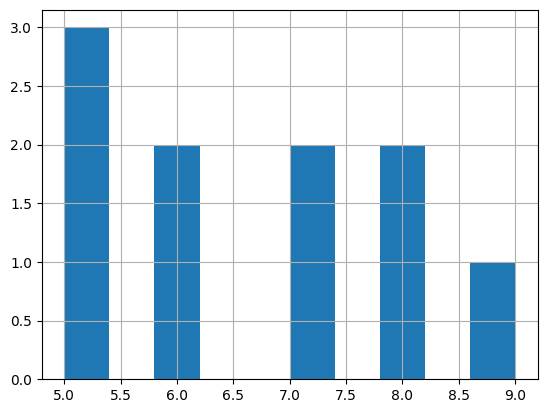

In [ ]:
df['Experience'].hist()

Calculate the average salary for male and female employees.



In [ ]:
df.groupby('Gender')['Salary'].mean()

,Salary
Gender,
Female,6780.0
Male,7460.0


Create a new DataFrame by selecting only the rows where the department is 'IT' and the salary is greater than 7000.

In [ ]:
df[(df['Department'] == 'IT') & (df['Salary'] > 7000)]

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining,Is_High_Salary
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000,5,True
6,7,Michael Garcia,IT,7500,6,2021-02-14,Male,90000,3,False
9,10,Barbara Wilson,IT,7200,9,2020-10-02,Female,86400,4,False


Calculate the average number of years since joining for each department.

In [ ]:
round(df.groupby('Department')['Years_Since_Joining'].mean(),2)

,Years_Since_Joining
Department,
Finance,3.67
Human Resources,5.33
IT,4.50


Count the number of employees in each department.



In [ ]:
df['Department'].value_counts()

,count
Department,
IT,4
Human Resources,3
Finance,3


Find the employee(s) with the most years of experience.



In [ ]:
df[df['Experience'] == df['Experience'].max()]

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining,Is_High_Salary
9,10,Barbara Wilson,IT,7200,9,2020-10-02,Female,86400,4,False


Create a DataFrame that shows the sum of salaries for each department and gender combination.



In [ ]:
df.pivot_table(columns='Department',index='Gender',values='Salary',aggfunc='sum')

Department,Finance,Human Resources,IT
Gender,,,
Female,NaN,18700.0,15200.0
Male,22800.0,NaN,14500.0


In [ ]:
df.groupby(['Department','Gender'])['Salary'].sum().reset_index()

,Department,Gender,Salary
0,Finance,Male,22800
1,Human Resources,Female,18700
2,IT,Female,15200
3,IT,Male,14500


Find the maximum salary in each department and the employee who earns it.

In [ ]:
df.iloc[df.groupby('Department')['Salary'].idxmax()]

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining,Is_High_Salary
3,4,James Williams,Finance,9000,8,2020-07-01,Male,108000,4,True
4,5,Patricia Brown,Human Resources,6500,5,2018-08-10,Female,78000,6,False
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000,5,True


Calculate the standard deviation of salaries in each department.



In [ ]:
df.groupby('Department')['Salary'].std()

,Salary
Department,
Finance,1216.552506
Human Resources,251.661148
IT,434.932945


Create a new DataFrame where the 'Salary' column is multiplied by 1.1, increasing all salaries by 10%.

In [ ]:
new_df = df.copy()

new_df['Salary'] = new_df['Salary'] * 1.1

new_df

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining,Is_High_Salary
0,1,John Smith,IT,7700.0,5,2018-01-15,Male,84000,6,False
1,2,Jane Doe,Human Resources,6600.0,6,2017-03-12,Female,72000,7,False
2,3,Mary Johnson,IT,8800.0,7,2019-05-23,Female,96000,5,True
3,4,James Williams,Finance,9900.0,8,2020-07-01,Male,108000,4,True
4,5,Patricia Brown,Human Resources,7150.0,5,2018-08-10,Female,78000,6,False
5,6,Robert Jones,Finance,7700.0,7,2019-09-29,Male,84000,5,False
6,7,Michael Garcia,IT,8250.0,6,2021-02-14,Male,90000,3,False
7,8,Linda Martinez,Human Resources,6820.0,5,2021-06-18,Female,74400,3,False
8,9,David Hernandez,Finance,7480.0,8,2022-11-21,Male,81600,2,False
9,10,Barbara Wilson,IT,7920.0,9,2020-10-02,Female,86400,4,False


Filter the DataFrame to include only rows where the 'Experience' is between 5 and 7 years.

In [ ]:
df[(df['Experience'] >=5) &(df['Experience'] <= 7)]

,Employee_ID,Employee_Name,Department,Salary,Experience,Joining_Date,Gender,Annual_Salary,Years_Since_Joining,Is_High_Salary
0,1,John Smith,IT,7000,5,2018-01-15,Male,84000,6,False
1,2,Jane Doe,Human Resources,6000,6,2017-03-12,Female,72000,7,False
2,3,Mary Johnson,IT,8000,7,2019-05-23,Female,96000,5,True
4,5,Patricia Brown,Human Resources,6500,5,2018-08-10,Female,78000,6,False
5,6,Robert Jones,Finance,7000,7,2019-09-29,Male,84000,5,False
6,7,Michael Garcia,IT,7500,6,2021-02-14,Male,90000,3,False
7,8,Linda Martinez,Human Resources,6200,5,2021-06-18,Female,74400,3,False


Create a pivot table that shows the average salary by department and gender.

In [ ]:
df.pivot_table(columns='Department',index='Gender',values='Salary',aggfunc='mean')

Department,Finance,Human Resources,IT
Gender,,,
Female,NaN,6233.333333,7600.0
Male,7600.0,NaN,7250.0


Calculate the rolling mean of the 'Salary' column with a window size of 3.



In [ ]:
df['Rolling_mean_salary'] = df['Salary'].rolling(window=3).mean()

df.head()

,Employee_ID,Name,Department,Salary,Age,Joining_Date,Gender,Experiance,Rolling_mean_salary
0,101,Alice,HR,7000,25,2020-01-10,Female,4,NaN
1,102,Bob,IT,8500,30,2019-05-15,Male,5,NaN
2,103,Charlie,Sales,6500,27,2021-07-20,Male,3,7333.333333
3,104,David,IT,9000,35,2018-03-10,Male,6,8000.000000
4,105,Eva,HR,7200,28,2020-10-05,Female,4,7566.666667


Resample the data to find the total salary paid each year.



In [ ]:
df.set_index('Joining_Date').resample('Y')['Salary'].sum()


,Salary
Joining_Date,
2017-12-31,8000
2018-12-31,16900
2019-12-31,17300
2020-12-31,21000
2021-12-31,13200


Identify employees who have a salary greater than the average salary of their department.

In [ ]:
df['Avg_Department_Salary'] = df.groupby('Department')['Salary'].transform('mean') #You want the group-wise aggregate (like mean, sum, max) but still keep the original row-level structure.
df[df['Salary'] > df['Avg_Department_Salary']]


,Employee_ID,Name,Department,Salary,Age,Joining_Date,Gender,Experiance,Rolling_mean_salary,Avg_Department_Salary
3,104,David,IT,9000,35,2018-03-10,Male,6,8000.000000,8766.666667
4,105,Eva,HR,7200,28,2020-10-05,Female,4,7566.666667,7000.000000
5,106,Frank,Finance,8000,40,2017-08-30,Male,7,8066.666667,7950.000000
6,107,Grace,Sales,6700,23,2021-09-15,Female,3,7300.000000,6600.000000
7,108,Henry,IT,8800,32,2019-12-01,Male,5,7833.333333,8766.666667


Create a new column that categorizes employees into salary bands: 'Low', 'Medium', 'High'.

In [ ]:
df['Salary_Band'] = pd.cut(df['Salary'], bins=[0, 6500, 7500, np.inf], labels=['Low', 'Medium', 'High'])
df.head()

,Employee_ID,Name,Department,Salary,Age,Joining_Date,Gender,Experiance,Rolling_mean_salary,Avg_Department_Salary,Salary_Band
0,101,Alice,HR,7000,25,2020-01-10,Female,4,NaN,7000.000000,Medium
1,102,Bob,IT,8500,30,2019-05-15,Male,5,NaN,8766.666667,High
2,103,Charlie,Sales,6500,27,2021-07-20,Male,3,7333.333333,6600.000000,Low
3,104,David,IT,9000,35,2018-03-10,Male,6,8000.000000,8766.666667,High
4,105,Eva,HR,7200,28,2020-10-05,Female,4,7566.666667,7000.000000,Medium


Find the cumulative sum of salaries in each department.



In [ ]:
df['Cumulative_Salary'] = df.groupby('Department')['Salary'].cumsum()

df.head()

,Employee_ID,Name,Department,Salary,Age,Joining_Date,Gender,Experiance,Rolling_mean_salary,Avg_Department_Salary,Salary_Band,Cumulative_Salary
0,101,Alice,HR,7000,25,2020-01-10,Female,4,NaN,7000.000000,Medium,7000
1,102,Bob,IT,8500,30,2019-05-15,Male,5,NaN,8766.666667,High,8500
2,103,Charlie,Sales,6500,27,2021-07-20,Male,3,7333.333333,6600.000000,Low,6500
3,104,David,IT,9000,35,2018-03-10,Male,6,8000.000000,8766.666667,High,17500
4,105,Eva,HR,7200,28,2020-10-05,Female,4,7566.666667,7000.000000,Medium,14200


Merging


In [ ]:
import pandas as pd
df_departments = pd.DataFrame({
    'Department': ['IT', 'HR', 'Finance', 'Marketing'],
    'Department_Head': ['Alice White', 'David King', 'Emma Stone', 'Bruce Wayne'],
    'Location': ['New York', 'Los Angeles', 'Chicago', 'San Francisco']
})


In [ ]:
df_departments

,Department,Department_Head,Location
0,IT,Alice White,New York
1,HR,David King,Los Angeles
2,Finance,Emma Stone,Chicago
3,Marketing,Bruce Wayne,San Francisco


In [ ]:
df_projects = pd.DataFrame({
    'Employee_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5],
    'Project_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 201, 202, 203, 204, 205],
    'Project_Name': ['AI Development', 'Recruitment Drive', 'Data Analysis', 'Budget Planning', 'Employee Engagement',
                     'Market Research', 'Network Setup', 'Training Program', 'Audit', 'Website Development',
                     'Mobile App', 'Hiring Strategy', 'Data Migration', 'Risk Assessment', 'Social Media Campaign'],
    'Project_Hours': [120, 100, 140, 110, 90, 130, 150, 115, 105, 160, 130, 120, 150, 140, 125]
})


In [ ]:
df_projects

,Employee_ID,Project_ID,Project_Name,Project_Hours
0,1,101,AI Development,120
1,2,102,Recruitment Drive,100
2,3,103,Data Analysis,140
3,4,104,Budget Planning,110
4,5,105,Employee Engagement,90
5,6,106,Market Research,130
6,7,107,Network Setup,150
7,8,108,Training Program,115
8,9,109,Audit,105
9,10,110,Website Development,160


In [ ]:
df_salaries = pd.DataFrame({
    'Employee_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5],
    'Year': [2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022],
    'Salary': [6500, 5800, 7200, 8500, 6200, 6700, 7200, 6000, 6600, 6800, 7000, 6000, 8000, 9000, 6500]
})


In [ ]:
df_salaries

,Employee_ID,Year,Salary
0,1,2021,6500
1,2,2021,5800
2,3,2021,7200
3,4,2021,8500
4,5,2021,6200
5,6,2021,6700
6,7,2021,7200
7,8,2021,6000
8,9,2021,6600
9,10,2021,6800


Merge the df DataFrame with df_departments on the 'Department' column to include department head and location information.

In [ ]:
pd.merge(df,df_departments,on = 'Department')

,Employee_ID,Name,Department,Salary,Age,Joining_Date,Gender,Experiance,Department_Head,Location
0,101,Alice,HR,7000,25,2020-01-10,Female,4,David King,Los Angeles
1,105,Eva,HR,7200,28,2020-10-05,Female,4,David King,Los Angeles
2,110,John,HR,6800,29,2020-04-14,Male,4,David King,Los Angeles
3,102,Bob,IT,8500,30,2019-05-15,Male,5,Alice White,New York
4,104,David,IT,9000,35,2018-03-10,Male,6,Alice White,New York
5,108,Henry,IT,8800,32,2019-12-01,Male,5,Alice White,New York
6,106,Frank,Finance,8000,40,2017-08-30,Male,7,Emma Stone,Chicago
7,109,Ivy,Finance,7900,36,2018-11-25,Female,6,Emma Stone,Chicago


Join the df DataFrame with df_projects on 'Employee_ID' to see the projects each employee is working on.

In [ ]:
pd.merge(df,df_projects,on='Employee_ID',how='inner')

,Employee_ID,Name,Department,Salary,Age,Joining_Date,Gender,Experiance,Project_ID,Project_Name,Project_Hours


Concatenate the df DataFrame with df_salaries to see the historical salary information along with current data.

In [ ]:
df_salaries_concat = pd.concat([df.set_index('Employee_ID'), df_salaries.set_index('Employee_ID')], axis=1)



InvalidIndexError: Reindexing only valid with uniquely valued Index objects

Find the total project hours worked by each employee using the df_projects table.

In [ ]:
total_project_hours = df_projects.groupby('Employee_ID')['Project_Hours'].sum().reset_index()
total_project_hours

,Employee_ID,Project_Hours
0,1,250
1,2,220
2,3,290
3,4,250
4,5,215
5,6,130
6,7,150
7,8,115
8,9,105
9,10,160


In [ ]:
pd.merge(df,total_project_hours,on='Employee_ID',how='left')

,Employee_ID,Name,Department,Salary,Age,Joining_Date,Gender,Experiance,Project_Hours
0,101,Alice,HR,7000,25,2020-01-10,Female,4,NaN
1,102,Bob,IT,8500,30,2019-05-15,Male,5,NaN
2,103,Charlie,Sales,6500,27,2021-07-20,Male,3,NaN
3,104,David,IT,9000,35,2018-03-10,Male,6,NaN
4,105,Eva,HR,7200,28,2020-10-05,Female,4,NaN
5,106,Frank,Finance,8000,40,2017-08-30,Male,7,NaN
6,107,Grace,Sales,6700,23,2021-09-15,Female,3,NaN
7,108,Henry,IT,8800,32,2019-12-01,Male,5,NaN
8,109,Ivy,Finance,7900,36,2018-11-25,Female,6,NaN
9,110,John,HR,6800,29,2020-04-14,Male,4,NaN


Filter employees who have worked on more than 3 projects using the df_projects table.

In [ ]:
employee_project_count = df_projects.groupby('Employee_ID').size().reset_index(name='Project_Count')
df_more_than_3_projects = employee_project_count[employee_project_count['Project_Count'] > 3]

df_more_than_3_projects

,Employee_ID,Project_Count


Lambda Function

In [ ]:
# 1. Apply on a column (Square of Salary)
df["Salary_Squared"] = df["Salary"].apply(lambda x: x**2)

# 2. Row-wise operation (Combine Name and Department)
df["Name_Dept"] = df.apply(lambda row: row["Name"] + " - " + row["Department"], axis=1)

# 3. Conditional transformation (Flag high earners)
df["High_Earner"] = df["Salary"].apply(lambda x: "Yes" if x > 65000 else "No")

# 4. Multiple column operation (Salary after 10% bonus)
df["Salary_Bonus"] = df.apply(lambda row: row["Salary"] * 1.1 if row["Department"] == "IT" else row["Salary"], axis=1)

# 5. Map with lambda (Shorten department names)
df["Dept_Short"] = df["Department"].map(lambda x: x[:2])

# 6. Filter rows using lambda (Age > 30)
filtered = df[df["Age"].apply(lambda x: x > 30)]

Exercies - 2

In [ ]:
import pandas as pd

# Create the first DataFrame: sales_data
sales_data = pd.DataFrame({
    'OrderID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'CustomerID': [101, 102, 101, 103, 104, 105, 102, 106, 107, 108],
    'Product': ['Laptop', 'Phone', 'Printer', 'Monitor', 'Chair', 'Desk', 'Laptop', 'Table', 'Phone', 'Sofa'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Electronics', 'Furniture', 'Electronics', 'Furniture'],
    'Quantity': [2, 1, 1, 1, 4, 2, 1, 3, 2, 1],
    'Price': [1200, 800, 150, 300, 100, 450, 1200, 200, 800, 700],
    'Date': pd.to_datetime(['2024-01-01', '2024-01-03', '2024-01-05', '2024-01-07', '2024-01-09', '2024-01-10', '2024-01-12', '2024-01-14', '2024-01-16', '2024-01-18']),
    'Region': ['East', 'West', 'East', 'North', 'South', 'South', 'West', 'North', 'East', 'West']
})

# Create the second DataFrame: customer_data
customer_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104, 105, 106, 107, 108],
    'CustomerName': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah'],
    'JoinDate': pd.to_datetime(['2023-06-01', '2023-07-15', '2023-08-10', '2023-09-05', '2023-10-20', '2023-11-12', '2024-01-02', '2024-01-15'])
})

# Display DataFrames
print("Sales Data:")
print(sales_data)

print("\nCustomer Data:")
print(customer_data)


Sales Data:
   OrderID  CustomerID  Product     Category  Quantity  Price       Date  \
0        1         101   Laptop  Electronics         2   1200 2024-01-01   
1        2         102    Phone  Electronics         1    800 2024-01-03   
2        3         101  Printer  Electronics         1    150 2024-01-05   
3        4         103  Monitor  Electronics         1    300 2024-01-07   
4        5         104    Chair    Furniture         4    100 2024-01-09   
5        6         105     Desk    Furniture         2    450 2024-01-10   
6        7         102   Laptop  Electronics         1   1200 2024-01-12   
7        8         106    Table    Furniture         3    200 2024-01-14   
8        9         107    Phone  Electronics         2    800 2024-01-16   
9       10         108     Sofa    Furniture         1    700 2024-01-18   

  Region  
0   East  
1   West  
2   East  
3  North  
4  South  
5  South  
6   West  
7  North  
8   East  
9   West  

Customer Data:
   CustomerID 

Join Operation
Q1: Merge sales_data and customer_data on CustomerID to get a DataFrame that includes all columns from both DataFrames.



In [ ]:
pd.merge(sales_data,customer_data,on='CustomerID',how='inner')

,OrderID,CustomerID,Product,Category,Quantity,Price,Date,Region,CustomerName,JoinDate
0,1,101,Laptop,Electronics,2,1200,2024-01-01,East,Alice,2023-06-01
1,3,101,Printer,Electronics,1,150,2024-01-05,East,Alice,2023-06-01
2,2,102,Phone,Electronics,1,800,2024-01-03,West,Bob,2023-07-15
3,7,102,Laptop,Electronics,1,1200,2024-01-12,West,Bob,2023-07-15
4,4,103,Monitor,Electronics,1,300,2024-01-07,North,Charlie,2023-08-10
5,5,104,Chair,Furniture,4,100,2024-01-09,South,David,2023-09-05
6,6,105,Desk,Furniture,2,450,2024-01-10,South,Eve,2023-10-20
7,8,106,Table,Furniture,3,200,2024-01-14,North,Frank,2023-11-12
8,9,107,Phone,Electronics,2,800,2024-01-16,East,Grace,2024-01-02
9,10,108,Sofa,Furniture,1,700,2024-01-18,West,Hannah,2024-01-15


GroupBy with Multiple Aggregations
Q2: Group sales_data by Region and Category, then calculate the total Quantity and average Price.

In [ ]:
sales_data.groupby(['Region','Category']).agg({'Quantity':'sum','Price':'mean'})

Quantity        Price
Region Category                          
East   Electronics         5   716.666667
North  Electronics         1   300.000000
       Furniture           3   200.000000
South  Furniture           6   275.000000
West   Electronics         2  1000.000000
       Furniture           1   700.000000

Conditional Aggregation
Q3: Calculate the total Quantity and average Price for products sold in the East region.

Conditional Aggregation
Q3: Calculate the total Quantity and average Price for products sold in the East region.

In [ ]:
total = sales_data[sales_data['Region'] == 'East']['Quantity'].sum()

avg = sales_data[sales_data['Region'] == 'East']['Price'].mean()

print(f"total quantity (East):{total},average price (east):{avg}")

total quantity (East):5,average price (east):716.6666666666666


Pivot Table with Multiple Aggregations
Q4: Create a pivot table showing the sum of Quantity and the average Price for each Product in each Region.

In [ ]:
sales_data.pivot_table(index='Region',columns='Product',values=['Quantity','Price'],aggfunc={'Quantity':'sum','Price':'mean'})

Price                                                     Quantity  \
Product  Chair   Desk  Laptop Monitor  Phone Printer   Sofa  Table    Chair   
Region                                                                        
East       NaN    NaN  1200.0     NaN  800.0   150.0    NaN    NaN      NaN   
North      NaN    NaN     NaN   300.0    NaN     NaN    NaN  200.0      NaN   
South    100.0  450.0     NaN     NaN    NaN     NaN    NaN    NaN      4.0   
West       NaN    NaN  1200.0     NaN  800.0     NaN  700.0    NaN      NaN   

                                                      
Product Desk Laptop Monitor Phone Printer Sofa Table  
Region                                                
East     NaN    2.0     NaN   2.0     1.0  NaN   NaN  
North    NaN    NaN     1.0   NaN     NaN  NaN   3.0  
South    2.0    NaN     NaN   NaN     NaN  NaN   NaN  
West     NaN    1.0     NaN   1.0     NaN  1.0   NaN

Date Range Filtering
Q5: Filter the sales_data to include only records where the Date is in January 2024.

In [ ]:
january_sales = sales_data[(sales_data['Date'] >= '2024-01-01') & (sales_data['Date'] < '2024-02-01')]
print(january_sales)


   OrderID  CustomerID  Product     Category  Quantity  Price       Date  \
0        1         101   Laptop  Electronics         2   1200 2024-01-01   
1        2         102    Phone  Electronics         1    800 2024-01-03   
2        3         101  Printer  Electronics         1    150 2024-01-05   
3        4         103  Monitor  Electronics         1    300 2024-01-07   
4        5         104    Chair    Furniture         4    100 2024-01-09   
5        6         105     Desk    Furniture         2    450 2024-01-10   
6        7         102   Laptop  Electronics         1   1200 2024-01-12   
7        8         106    Table    Furniture         3    200 2024-01-14   
8        9         107    Phone  Electronics         2    800 2024-01-16   
9       10         108     Sofa    Furniture         1    700 2024-01-18   

  Region  
0   East  
1   West  
2   East  
3  North  
4  South  
5  South  
6   West  
7  North  
8   East  
9   West  


In [ ]:
sales_data.head(5)

,OrderID,CustomerID,Product,Category,Quantity,Price,Date,Region
0,1,101,Laptop,Electronics,2,1200,2024-01-01,East
1,2,102,Phone,Electronics,1,800,2024-01-03,West
2,3,101,Printer,Electronics,1,150,2024-01-05,East
3,4,103,Monitor,Electronics,1,300,2024-01-07,North
4,5,104,Chair,Furniture,4,100,2024-01-09,South


In [ ]:
customer_data.head(5)

,CustomerID,CustomerName,JoinDate
0,101,Alice,2023-06-01
1,102,Bob,2023-07-15
2,103,Charlie,2023-08-10
3,104,David,2023-09-05
4,105,Eve,2023-10-20


In [ ]:
df.head()

,Employee_ID,Name,Department,Salary,Experience,City,Joining_Date,Gender
0,1,John Smith,IT,7000,5,New York,2018-01-15,M
1,2,Jane Doe,HR,6000,6,Los Angeles,2017-03-12,F
2,3,Mary Johnson,IT,8000,7,New York,2019-05-23,F
3,4,James Williams,Finance,9000,8,Chicago,2020-07-01,M
4,5,Patricia Brown,HR,6500,5,Los Angeles,2018-08-10,F


In [ ]:
df["Department"].mode()[0]

'IT'

All Windows

In [1]:
import pandas as pd

# Sample Data
data = {'day': pd.date_range('2025-01-01', periods=10, freq='D'),
        'sales': [10, 20, 20, 30, 40, 50, 35, 45, 55, 60]}
df = pd.DataFrame(data)

print("Original Data:")
print(df)

# ------------------------------------------------
# 1. Rolling Window (Moving calculations)
# ------------------------------------------------
df['rolling_mean_3']  = df['sales'].rolling(window=3).mean()   # Moving Average
df['rolling_sum_3']   = df['sales'].rolling(window=3).sum()    # Moving Sum
df['rolling_std_3']   = df['sales'].rolling(window=3).std()    # Moving Std Dev
df['rolling_custom']  = df['sales'].rolling(3).apply(lambda x: x.max() - x.min())  # Custom

# ------------------------------------------------
# 2. Expanding Window (Cumulative aggregates)
# ------------------------------------------------
df['expanding_mean']  = df['sales'].expanding().mean()
df['expanding_sum']   = df['sales'].expanding().sum()

# ------------------------------------------------
# 3. Exponentially Weighted Window
# ------------------------------------------------
df['ewm_mean']        = df['sales'].ewm(span=3, adjust=False).mean()

# ------------------------------------------------
# 4. Cumulative Functions
# ------------------------------------------------
df['cumsum']          = df['sales'].cumsum()
df['cummax']          = df['sales'].cummax()
df['cummin']          = df['sales'].cummin()

# ------------------------------------------------
# 5. Ranking Functions (SQL equivalents)
# ------------------------------------------------
df['row_number']      = df['sales'].rank(method='first')          # ROW_NUMBER()
df['rank']            = df['sales'].rank(method='min')            # RANK()
df['dense_rank']      = df['sales'].rank(method='dense')          # DENSE_RANK()
df['cume_dist']       = df['sales'].rank(method='max', pct=True)  # CUME_DIST()
df['percent_rank']    = (df['sales'].rank(method='min') - 1) / (len(df)-1)  # PERCENT_RANK()

# ------------------------------------------------
# 6. NTILE / Quantile Bucketing
# ------------------------------------------------
df['quartile']        = pd.qcut(df['sales'], 4, labels=False) + 1  # Quartiles

# ------------------------------------------------
# Final Output
# ------------------------------------------------
print("\nData with Important Window Functions Applied:")
print(df)


Original Data:
         day  sales
0 2025-01-01     10
1 2025-01-02     20
2 2025-01-03     20
3 2025-01-04     30
4 2025-01-05     40
5 2025-01-06     50
6 2025-01-07     35
7 2025-01-08     45
8 2025-01-09     55
9 2025-01-10     60

Data with Important Window Functions Applied:
         day  sales  rolling_mean_3  rolling_sum_3  rolling_std_3  \
0 2025-01-01     10             NaN            NaN            NaN   
1 2025-01-02     20             NaN            NaN            NaN   
2 2025-01-03     20       16.666667           50.0       5.773503   
3 2025-01-04     30       23.333333           70.0       5.773503   
4 2025-01-05     40       30.000000           90.0      10.000000   
5 2025-01-06     50       40.000000          120.0      10.000000   
6 2025-01-07     35       41.666667          125.0       7.637626   
7 2025-01-08     45       43.333333          130.0       7.637626   
8 2025-01-09     55       45.000000          135.0      10.000000   
9 2025-01-10     60       53

📌 What is resample in Pandas?

resample() is similar to groupby, but specifically designed for time-series data.

It is used to change the frequency of time-series data → either downsampling (reduce frequency) or upsampling (increase frequency).

Common use cases:

Converting daily data to monthly or weekly

Aggregating by time periods (mean, sum, etc.)

Filling in missing time periods

In [2]:
import pandas as pd

# Sample time series data
data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'sales': [100, 150, 200, 170, 180, 90, 300, 250, 400, 350]
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

print("Original Data:")
print(df)

# 1. Resample weekly (W) and take sum
weekly_sales = df.resample('W').sum()
print("\nWeekly Sales (Sum):")
print(weekly_sales)

# 2. Resample monthly (M) and take mean
monthly_avg = df.resample('M').mean()
print("\nMonthly Average Sales:")
print(monthly_avg)

# 3. Upsample to hourly and forward fill
hourly_sales = df.resample('H').ffill()
print("\nHourly Sales (Forward Fill):")
print(hourly_sales.head(10))


Original Data:
            sales
date             
2023-01-01    100
2023-01-02    150
2023-01-03    200
2023-01-04    170
2023-01-05    180
2023-01-06     90
2023-01-07    300
2023-01-08    250
2023-01-09    400
2023-01-10    350

Weekly Sales (Sum):
            sales
date             
2023-01-01    100
2023-01-08   1340
2023-01-15    750

Monthly Average Sales:
            sales
date             
2023-01-31  219.0

Hourly Sales (Forward Fill):
                     sales
date                      
2023-01-01 00:00:00    100
2023-01-01 01:00:00    100
2023-01-01 02:00:00    100
2023-01-01 03:00:00    100
2023-01-01 04:00:00    100
2023-01-01 05:00:00    100
2023-01-01 06:00:00    100
2023-01-01 07:00:00    100
2023-01-01 08:00:00    100
2023-01-01 09:00:00    100


/tmp/ipython-input-603283246.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()
/tmp/ipython-input-603283246.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_sales = df.resample('H').ffill()


Handle Nulls

In [9]:
import pandas as pd
import numpy as np

# Dataset 1
df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', None, 'David'],
    'Age': [25, np.nan, 30, 40]
})
print("Dataset 1:\n", df1)

# Detect nulls
print(df1.isnull())
print(df1.isnull().sum())


Dataset 1:
     Name   Age
0  Alice  25.0
1    Bob   NaN
2   None  30.0
3  David  40.0
    Name    Age
0  False  False
1  False   True
2   True  False
3  False  False
Name    1
Age     1
dtype: int64


In [10]:
# Dataset 2
df2 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Score': [90, None, 85, None]
})
print("\nDataset 2:\n", df2)

# Drop rows with nulls
print(df2.dropna())                  # Drop rows with any null
print(df2.dropna(how='all'))         # Drop rows only if all values null



Dataset 2:
    ID  Score
0   1   90.0
1   2    NaN
2   3   85.0
3   4    NaN
   ID  Score
0   1   90.0
2   3   85.0
   ID  Score
0   1   90.0
1   2    NaN
2   3   85.0
3   4    NaN


In [11]:
# Dataset 3
df3 = pd.DataFrame({
    'Product': ['A', 'B', 'C', 'D'],
    'Price': [100, None, 250, None]
})
print("\nDataset 3:\n", df3)

# Fill with constant
print(df3.fillna(0))



Dataset 3:
   Product  Price
0       A  100.0
1       B    NaN
2       C  250.0
3       D    NaN
  Product  Price
0       A  100.0
1       B    0.0
2       C  250.0
3       D    0.0


In [12]:
# Dataset 4
df4 = pd.DataFrame({
    'Student': ['X', 'Y', 'Z', 'W'],
    'Marks': [50, None, 80, None]
})
print("\nDataset 4:\n", df4)

# Fill with mean/median
print(df4['Marks'].fillna(df4['Marks'].mean()))
print(df4['Marks'].fillna(df4['Marks'].median()))



Dataset 4:
   Student  Marks
0       X   50.0
1       Y    NaN
2       Z   80.0
3       W    NaN
0    50.0
1    65.0
2    80.0
3    65.0
Name: Marks, dtype: float64
0    50.0
1    65.0
2    80.0
3    65.0
Name: Marks, dtype: float64


In [13]:
# Dataset 5
df5 = pd.DataFrame({
    'Day': pd.date_range('2023-01-01', periods=5, freq='D'),
    'Temperature': [30, None, None, 28, 27]
})
print("\nDataset 5:\n", df5)

# Forward fill
print(df5.fillna(method='ffill'))

# Backward fill
print(df5.fillna(method='bfill'))



Dataset 5:
          Day  Temperature
0 2023-01-01         30.0
1 2023-01-02          NaN
2 2023-01-03          NaN
3 2023-01-04         28.0
4 2023-01-05         27.0
         Day  Temperature
0 2023-01-01         30.0
1 2023-01-02         30.0
2 2023-01-03         30.0
3 2023-01-04         28.0
4 2023-01-05         27.0
         Day  Temperature
0 2023-01-01         30.0
1 2023-01-02         28.0
2 2023-01-03         28.0
3 2023-01-04         28.0
4 2023-01-05         27.0


/tmp/ipython-input-1076046226.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df5.fillna(method='ffill'))
/tmp/ipython-input-1076046226.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df5.fillna(method='bfill'))


In [14]:
# Dataset 6
df6 = pd.DataFrame({
    'Day': [1, 2, 3, 4, 5],
    'Sales': [100, None, None, 400, 500]
})
print("\nDataset 6:\n", df6)

# Interpolation
print(df6['Sales'].interpolate(method='linear'))



Dataset 6:
    Day  Sales
0    1  100.0
1    2    NaN
2    3    NaN
3    4  400.0
4    5  500.0
0    100.0
1    200.0
2    300.0
3    400.0
4    500.0
Name: Sales, dtype: float64


In [15]:
# Dataset 7
df7 = pd.DataFrame({
    'EmpID': [101, 102, 103, 104],
    'Bonus': [5000, None, None, 7000]
})
print("\nDataset 7:\n", df7)

# Replace with -1
print(df7.replace(to_replace=np.nan, value=-1))



Dataset 7:
    EmpID   Bonus
0    101  5000.0
1    102     NaN
2    103     NaN
3    104  7000.0
   EmpID   Bonus
0    101  5000.0
1    102    -1.0
2    103    -1.0
3    104  7000.0


In [16]:
# Dataset 8
df8 = pd.DataFrame({
    'Age': [25, None, 30, None],
    'Salary': [50000, None, 70000, 80000],
    'Dept': ['HR', None, 'IT', None]
})
print("\nDataset 8:\n", df8)

# Fill each column differently
print(df8.fillna({
    'Age': df8['Age'].median(),
    'Salary': df8['Salary'].mean(),
    'Dept': 'Not Assigned'
}))



Dataset 8:
     Age   Salary  Dept
0  25.0  50000.0    HR
1   NaN      NaN  None
2  30.0  70000.0    IT
3   NaN  80000.0  None
    Age        Salary          Dept
0  25.0  50000.000000            HR
1  27.5  66666.666667  Not Assigned
2  30.0  70000.000000            IT
3  27.5  80000.000000  Not Assigned


In [17]:
# Dataset 9
df9 = pd.DataFrame({
    'A': [1, 2, None],
    'B': [None, 5, 6]
})
print("\nDataset 9:\n", df9)

print(df9.isnull().values.any())   # True if any null
print(df9.isnull().sum().sum())    # Total number of nulls



Dataset 9:
      A    B
0  1.0  NaN
1  2.0  5.0
2  NaN  6.0
True
2


Cleaning Project

In [21]:
import pandas as pd
import numpy as np

# 🔹 Step 1: Create a big messy dataset
data = {
    'EmpID': [101, 102, 103, 104, 105, 105, 106, 107, None],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None, 'Eva', 'Frank', 'Grace', 'Henry'],
    'Age': [25, None, 30, 40, 35, 35, None, 29, 45],
    'Department': ['HR', 'Finance', None, 'IT', 'Finance', 'Finance', 'HR', 'IT', 'Finance'],
    'Salary': [50000, 60000, np.nan, 80000, 90000, 90000, 40000, None, 75000],
    'JoiningDate': ['2020-01-01', '2021-03-15', None, '2019-07-10', '2020-05-20', '2020-05-20',
                    '2022-01-01', '2022-05-11', '2018-09-23'],
    'Bonus%': ['10%', None, '15%', '20%', '15%', '15%', '8%', None, '12%']
}

df = pd.DataFrame(data)
df

,EmpID,Name,Age,Department,Salary,JoiningDate,Bonus%
0,101.0,Alice,25.0,HR,50000.0,2020-01-01,10%
1,102.0,Bob,NaN,Finance,60000.0,2021-03-15,None
2,103.0,Charlie,30.0,None,NaN,None,15%
3,104.0,David,40.0,IT,80000.0,2019-07-10,20%
4,105.0,None,35.0,Finance,90000.0,2020-05-20,15%
5,105.0,Eva,35.0,Finance,90000.0,2020-05-20,15%
6,106.0,Frank,NaN,HR,40000.0,2022-01-01,8%
7,107.0,Grace,29.0,IT,NaN,2022-05-11,None
8,NaN,Henry,45.0,Finance,75000.0,2018-09-23,12%


In [20]:
# Fill numeric columns with statistics
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# Fill categorical columns with mode or label
df['Department'].fillna(df['Department'].mode()[0], inplace=True)
df['Name'].fillna("Unknown", inplace=True)

# Fill Bonus% with '0%'
df['Bonus%'].fillna("0%", inplace=True)

# Fill JoiningDate missing with forward fill
df['JoiningDate'].fillna(method='ffill', inplace=True)

df

/tmp/ipython-input-1925519527.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1925519527.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,EmpID,Name,Age,Department,Salary,JoiningDate,Bonus%
0,101.0,Alice,25.0,HR,50000.000000,2020-01-01,10%
1,102.0,Bob,35.0,Finance,60000.000000,2021-03-15,0%
2,103.0,Charlie,30.0,Finance,69285.714286,2021-03-15,15%
3,104.0,David,40.0,IT,80000.000000,2019-07-10,20%
4,105.0,Unknown,35.0,Finance,90000.000000,2020-05-20,15%
5,105.0,Eva,35.0,Finance,90000.000000,2020-05-20,15%
6,106.0,Frank,35.0,HR,40000.000000,2022-01-01,8%
7,107.0,Grace,29.0,IT,69285.714286,2022-05-11,0%
8,NaN,Henry,45.0,Finance,75000.000000,2018-09-23,12%


In [22]:
df = df.drop_duplicates()
print("\n🔹 After Removing Duplicates:\n", df)



🔹 After Removing Duplicates:
    EmpID     Name   Age Department   Salary JoiningDate Bonus%
0  101.0    Alice  25.0         HR  50000.0  2020-01-01    10%
1  102.0      Bob   NaN    Finance  60000.0  2021-03-15   None
2  103.0  Charlie  30.0       None      NaN        None    15%
3  104.0    David  40.0         IT  80000.0  2019-07-10    20%
4  105.0     None  35.0    Finance  90000.0  2020-05-20    15%
5  105.0      Eva  35.0    Finance  90000.0  2020-05-20    15%
6  106.0    Frank   NaN         HR  40000.0  2022-01-01     8%
7  107.0    Grace  29.0         IT      NaN  2022-05-11   None
8    NaN    Henry  45.0    Finance  75000.0  2018-09-23    12%


In [23]:
# Convert JoiningDate to datetime
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])

# Convert Bonus% to numeric
df['Bonus%'] = df['Bonus%'].str.replace('%', '').astype(float)

print("\n🔹 After Data Type Conversion:\n", df.dtypes)



🔹 After Data Type Conversion:
 EmpID                 float64
Name                   object
Age                   float64
Department             object
Salary                float64
JoiningDate    datetime64[ns]
Bonus%                float64
dtype: object


In [24]:
df.loc[df['Salary'] > 100000, 'Salary'] = df['Salary'].median()
print("\n🔹 After Handling Outliers:\n", df)



🔹 After Handling Outliers:
    EmpID     Name   Age Department   Salary JoiningDate  Bonus%
0  101.0    Alice  25.0         HR  50000.0  2020-01-01    10.0
1  102.0      Bob   NaN    Finance  60000.0  2021-03-15     NaN
2  103.0  Charlie  30.0       None      NaN         NaT    15.0
3  104.0    David  40.0         IT  80000.0  2019-07-10    20.0
4  105.0     None  35.0    Finance  90000.0  2020-05-20    15.0
5  105.0      Eva  35.0    Finance  90000.0  2020-05-20    15.0
6  106.0    Frank   NaN         HR  40000.0  2022-01-01     8.0
7  107.0    Grace  29.0         IT      NaN  2022-05-11     NaN
8    NaN    Henry  45.0    Finance  75000.0  2018-09-23    12.0


In [25]:
df['Department'] = df['Department'].str.strip().str.title()
df['Name'] = df['Name'].str.strip().str.title()
print("\n🔹 After Standardizing Text:\n", df)



🔹 After Standardizing Text:
    EmpID     Name   Age Department   Salary JoiningDate  Bonus%
0  101.0    Alice  25.0         Hr  50000.0  2020-01-01    10.0
1  102.0      Bob   NaN    Finance  60000.0  2021-03-15     NaN
2  103.0  Charlie  30.0       None      NaN         NaT    15.0
3  104.0    David  40.0         It  80000.0  2019-07-10    20.0
4  105.0     None  35.0    Finance  90000.0  2020-05-20    15.0
5  105.0      Eva  35.0    Finance  90000.0  2020-05-20    15.0
6  106.0    Frank   NaN         Hr  40000.0  2022-01-01     8.0
7  107.0    Grace  29.0         It      NaN  2022-05-11     NaN
8    NaN    Henry  45.0    Finance  75000.0  2018-09-23    12.0


In [26]:
# Calculate Bonus Amount
df['BonusAmount'] = (df['Salary'] * df['Bonus%']) / 100

# Extract Year of Joining
df['JoiningYear'] = df['JoiningDate'].dt.year

print("\n🔹 After Feature Engineering:\n", df)



🔹 After Feature Engineering:
    EmpID     Name   Age Department   Salary JoiningDate  Bonus%  BonusAmount  \
0  101.0    Alice  25.0         Hr  50000.0  2020-01-01    10.0       5000.0   
1  102.0      Bob   NaN    Finance  60000.0  2021-03-15     NaN          NaN   
2  103.0  Charlie  30.0       None      NaN         NaT    15.0          NaN   
3  104.0    David  40.0         It  80000.0  2019-07-10    20.0      16000.0   
4  105.0     None  35.0    Finance  90000.0  2020-05-20    15.0      13500.0   
5  105.0      Eva  35.0    Finance  90000.0  2020-05-20    15.0      13500.0   
6  106.0    Frank   NaN         Hr  40000.0  2022-01-01     8.0       3200.0   
7  107.0    Grace  29.0         It      NaN  2022-05-11     NaN          NaN   
8    NaN    Henry  45.0    Finance  75000.0  2018-09-23    12.0       9000.0   

   JoiningYear  
0       2020.0  
1       2021.0  
2          NaN  
3       2019.0  
4       2020.0  
5       2020.0  
6       2022.0  
7       2022.0  
8       2018.0 